In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow import keras

In [2]:
from settings import path
from load import load, write

from a2 import (get_common_feature,
                get_common_feature_dict,
                get_model,
                MyDataGenerator)

In [3]:
pd.set_option('mode.chained_assignment', None)

In [4]:
TRY_NEW_MODEL = True
MODEL_SAVE_PATH = path['model']['approach_2']
FIT_DATA_FILE = path['model']['approach_2'] / 'fit_data_for_model.pickle'

In [5]:
%%time
dg = MyDataGenerator(model_batch_size=20,
                     pca_var=0.999,
                     pca_sample_size=100000,
                     force_pca_fitting=True,
                     verbose=100)
dg.data_shape

load main dataframe (5.7 Gb)
load target dataframe (2 Mb)
prepare pca model (100000 samples, 82 Mb)
fit pca model (fitted)
load main dataframe in dict splitted by users (loaded)
CPU times: total: 43.6 s
Wall time: 24.9 s


(20, 172)

In [6]:
if MODEL_SAVE_PATH.exists() and len(list(MODEL_SAVE_PATH.glob('*'))) > 2 and not TRY_NEW_MODEL:
    model = keras.models.load_model(MODEL_SAVE_PATH)
    print('model is loaded')
else:
    # model = get_model(dg.data_shape)
    model = get_model(dg.data_shape,
              multihead_count=2, heads=10,
              ff_count=2, ff_wide=100, ff_activation='relu',
              last_ff_count=2, last_ff_wide=100, last_ff_activation='relu',
              filters=16,
              dropout=0.1)
fit_res = load(FIT_DATA_FILE, dict())

In [7]:
def plot(fit_res=fit_res):
    data = fit_res['binary_accuracy']
    
    _, ax = plt.subplots(figsize=(20, 3))
    ax.plot(data)
    ax.plot(pd.Series(data).rolling(5).mean())
    ax.set_title(f"model accuracy {np.mean(data[-10:]):.3f}")
    ax.set_ylabel('accuracy')
    ax.set_xlabel('epoch')
    plt.show()

Epoch 1/10
200/200 [==============================] - 264s 1s/step - loss: 0.7350 - binary_accuracy: 0.5079
Epoch 2/10
200/200 [==============================] - 277s 1s/step - loss: 0.7005 - binary_accuracy: 0.5284
Epoch 3/10
200/200 [==============================] - 252s 1s/step - loss: 0.6867 - binary_accuracy: 0.5449
Epoch 4/10
200/200 [==============================] - 278s 1s/step - loss: 0.6817 - binary_accuracy: 0.5558
Epoch 5/10
200/200 [==============================] - 265s 1s/step - loss: 0.6912 - binary_accuracy: 0.5437
Epoch 6/10
200/200 [==============================] - 273s 1s/step - loss: 0.6868 - binary_accuracy: 0.5513
Epoch 7/10
200/200 [==============================] - 268s 1s/step - loss: 0.6877 - binary_accuracy: 0.5411
Epoch 8/10
200/200 [==============================] - 284s 1s/step - loss: 0.6885 - binary_accuracy: 0.5455
Epoch 9/10
200/200 [==============================] - 300s 1s/step - loss: 0.6886 - binary_accuracy: 0.5458
Epoch 10/10
200/200 [=======

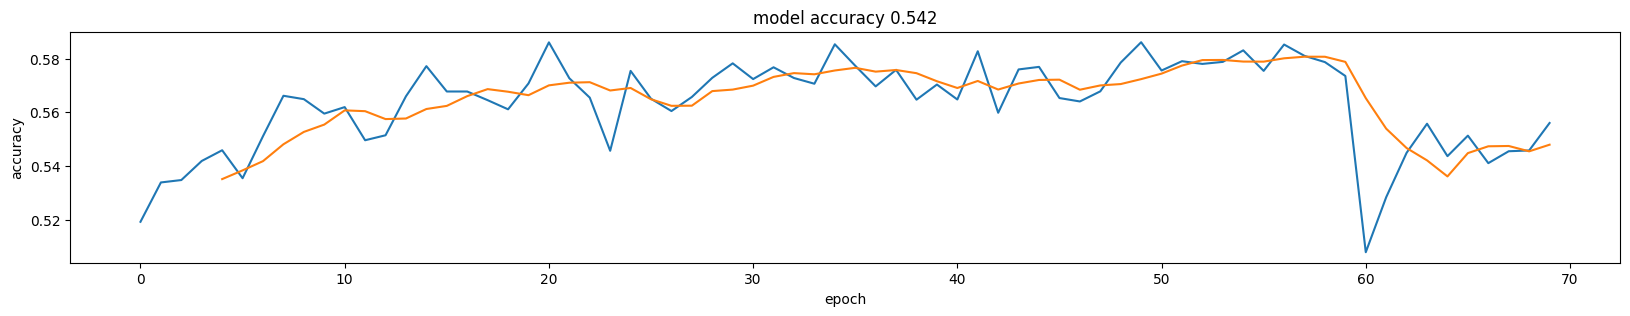

INFO:tensorflow:Assets written to: D:\anaconda\mts_cup\model\approach_2\assets


INFO:tensorflow:Assets written to: D:\anaconda\mts_cup\model\approach_2\assets


Epoch 1/10
200/200 [==============================] - 257s 1s/step - loss: 0.6817 - binary_accuracy: 0.5598
Epoch 2/10
190/200 [===========================>..] - ETA: 14s - loss: 0.6866 - binary_accuracy: 0.5482


KeyboardInterrupt



In [8]:
%%time
for _ in range(10):
    history = model.fit(dg, steps_per_epoch=200,
                        validation_data=None,
                        epochs=10, verbose=1)
    for k, v in history.history.items():
        if k not in fit_res:
            fit_res[k] = []
        fit_res[k] += v
    plot()
    model.save(MODEL_SAVE_PATH)
    write(FIT_DATA_FILE, fit_res)

In [9]:
plt.plot(fit_res['binary_accuracy'])
plt.title(f"model accuracy {np.mean(history.history['binary_accuracy']):.3f}")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()


KeyboardInterrupt

